In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
df = pd.read_csv("titanic.csv")

In [256]:
print("Dataset Shape:", df.shape)

Dataset Shape: (891, 12)


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [258]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [259]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [261]:
df1=df

In [262]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

In [263]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [264]:
import re

In [265]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(get_title)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_4903/3631760618.py:2: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


In [266]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [267]:
df['Title'] .value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [268]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [269]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [270]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [271]:
df['Title'] .value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [272]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [273]:
df['Is_Alone'] = 0
df.loc[df['Family_Size'] == 1, 'Is_Alone'] = 1
#Logistic Regression finds it much easier to learn from a simple 1 or 0

In [274]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [275]:
df = pd.get_dummies(df, columns=['Embarked', 'Title','Is_Alone'], drop_first=True)

In [276]:
df = df.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId','Cabin'], axis=1)

In [277]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Is_Alone_1
0,0,3,0,22.0,7.2500,2,False,True,False,True,False,False,False
1,1,1,1,38.0,71.2833,2,False,False,False,False,True,False,False
2,1,3,1,26.0,7.9250,1,False,True,True,False,False,False,True
3,1,1,1,35.0,53.1000,2,False,True,False,False,True,False,False
4,0,3,0,35.0,8.0500,1,False,True,False,True,False,False,True


In [278]:
class LogReg:
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        self.loss = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def fit(self, X, y):
        n = X.shape[0]
        m = X.shape[1]
        self.w = np.zeros(m)
        self.b = 0
        
        for i in range(self.itr):
            # Forward pass
            z = np.dot(X, self.w) + self.b
            yp = self.sigmoid(z)
            
            
            dw = (1/n) * np.dot(X.T, (yp - y))
            db = (1/n) * np.sum(yp - y)
            
          
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            
            l = -(1/n) * np.sum(y * np.log(yp + 1e-8) + (1 - y) * np.log(1 - yp + 1e-8))
            self.loss.append(l)
    
    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [279]:
def split_data(X, y, ts=0.2, rs=42):
    np.random.seed(rs)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    sp = int((1 - ts) * X.shape[0])
    return X[:sp], X[sp:], y[:sp], y[sp:]


In [280]:
def norm(X_tr, X_te):
    mn = X_tr.min(axis=0)
    mx = X_tr.max(axis=0)
    X_tr_n = (X_tr - mn) / (mx - mn + 1e-8)
    X_te_n = (X_te - mn) / (mx - mn + 1e-8)
    return X_tr_n, X_te_n

In [281]:
def accuracy(yt, yp):
    return np.mean(yt == yp)

In [282]:
def precision(yt, yp):
    tp = np.sum((yt == 1) & (yp == 1))
    fp = np.sum((yt == 0) & (yp == 1))
    return tp / (tp + fp + 1e-8)

In [283]:
def recall(yt, yp):
    tp = np.sum((yt == 1) & (yp == 1))
    fn = np.sum((yt == 1) & (yp == 0))
    return tp / (tp + fn + 1e-8)

In [284]:
def f1_score(yt, yp):
    prec = precision(yt, yp)
    rec = recall(yt, yp)
    return 2 * (prec * rec) / (prec + rec + 1e-8)

In [285]:
def confusion_matrix(yt, yp):
    tn = np.sum((yt == 0) & (yp == 0))
    fp = np.sum((yt == 0) & (yp == 1))
    fn = np.sum((yt == 1) & (yp == 0))
    tp = np.sum((yt == 1) & (yp == 1))
    return np.array([[tn, fp], [fn, tp]])

In [286]:
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

In [287]:
X_tr, X_te, y_tr, y_te = split_data(X, y, ts=0.2, rs=42)
X_tr_n, X_te_n = norm(X_tr, X_te)

In [288]:
X_tr_n = np.array(X_tr_n, dtype=np.float64)
y_tr = np.array(y_tr, dtype=np.float64)

In [289]:
model = LogReg(lr=0.1, itr=2000)
model.fit(X_tr_n, y_tr)

In [290]:
X_te_n = X_te_n.astype(np.float64)
y_te_pred = model.predict(X_te_n)

In [291]:
y_tr_pred = model.predict(X_tr_n)
y_te_pred = model.predict(X_te_n)

In [292]:
acc_te = accuracy(y_te, y_te_pred)
prec_te = precision(y_te, y_te_pred)
rec_te = recall(y_te, y_te_pred)
f1_te = f1_score(y_te, y_te_pred)

In [293]:
print(f"Accuracy:  {acc_te:.4f} ({acc_te*100:.2f}%)")
print(f"Precision: {prec_te:.4f}")
print(f"Recall:    {rec_te:.4f}")
print(f"F1-Score:  {f1_te:.4f}")

Accuracy:  0.8156 (81.56%)
Precision: 0.7667
Recall:    0.7077
F1-Score:  0.7360


In [294]:
cm = confusion_matrix(y_te, y_te_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[100  14]
 [ 19  46]]


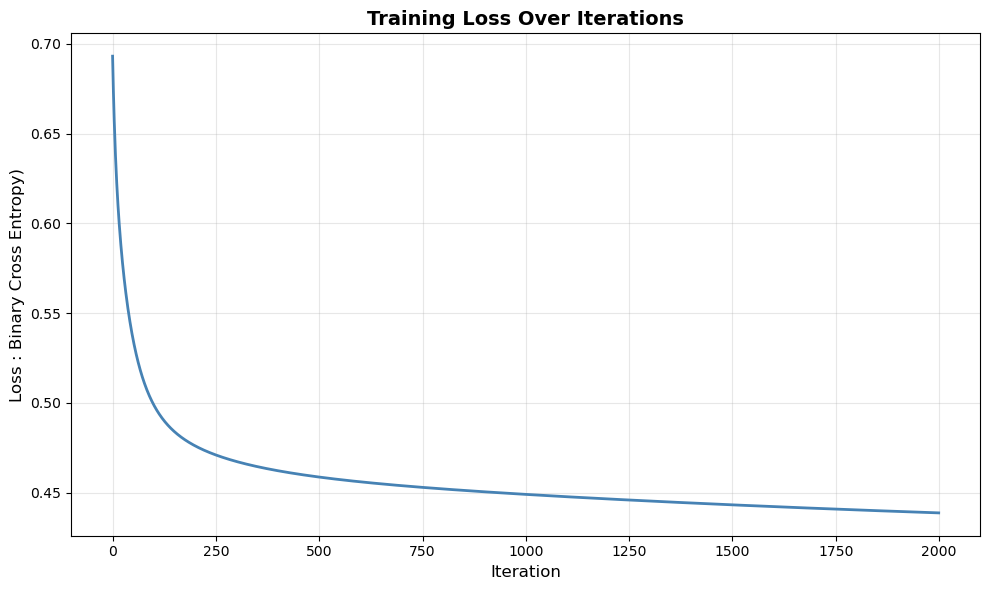

In [299]:
# 1. Loss curve
plt.figure(figsize=(10, 6))
plt.plot(model.loss, linewidth=2, color='steelblue')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss : Binary Cross Entropy)', fontsize=12)
plt.title('Training Loss Over Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [296]:
results_df = pd.DataFrame({
    'Actual': y_te,
    'Predicted': y_te_pred,
    'Probability': y_te_proba,
    'Correct': y_te == y_te_pred
})

In [297]:
print(results_df.head(10))

   Actual  Predicted  Probability  Correct
0       0          0     0.203558     True
1       0          0     0.082590     True
2       1          0     0.378386    False
3       1          1     0.762825     True
4       1          1     0.729453     True
5       0          0     0.200291     True
6       1          1     0.912572     True
7       1          1     0.595637     True
8       0          0     0.198517     True
9       0          0     0.360348     True


In [300]:
print(f"Correct predictions: {results_df['Correct'].sum()} / {len(results_df)}")
print(f"Incorrect predictions: {(~results_df['Correct']).sum()} / {len(results_df)}")
print(f"Accuracy: {acc_te*100:.2f}%")

Correct predictions: 146 / 179
Incorrect predictions: 33 / 179
Accuracy: 81.56%
